<a href="https://colab.research.google.com/github/SATYA1962S/digit_1/blob/main/AMINI_Soil_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
muhammadqasimshabbir_amini_soil_prediction_challenge_dataset_path = kagglehub.dataset_download('muhammadqasimshabbir/amini-soil-prediction-challenge-dataset')

print('Data source import complete.')


100%|██████████| 518M/518M [00:02<00:00, 183MB/s]

Extracting files...


Data source import complete.


# **Predicting Nutrient Gaps: A Beginner-Friendly Guide**

## **Introduction**

Welcome! This notebook will guide you through the process of building a machine learning model to predict nutrient gaps in soil.
We'll cover data loading, exploratory data analysis (EDA), feature preprocessing, model training, evaluation, and submission.

### **What You Will Learn**

- How to load and inspect data in Python using `pandas`
- How to explore data with visualizations using `matplotlib` and `seaborn`
- How to preprocess data for machine learning
- How to train a simple machine learning model using `scikit-learn`
- How to evaluate model performance
- How to generate and save predictions for submission

#### **Additional Reading for Beginners**

- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Visualization Guide](https://seaborn.pydata.org/tutorial.html)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)

Let's get started! 🚀


## **Step 1: Load the Data**

We begin by loading the training and test datasets using `pandas`. The dataset consists of different features, with `pH` as the target variable in the training data.

### **Tips for Beginners**

- The `train.csv` file contains both the features and the target variable (`pH`).
- The `test.csv` file contains only the features (we need to predict `pH` for these).
- Always check the first few rows of the dataset using `.head()` to understand its structure.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## **Step 2: Exploratory Data Analysis (EDA)**

EDA helps us understand the data better before building a model.

### **Why is EDA Important?**
- It reveals patterns, trends, and potential issues in the data.
- It helps us decide which preprocessing steps are needed.
- It allows us to visualize relationships between variables.

### **Tips for Beginners**
- Always check for missing values and outliers.
- Use histograms to see the distribution of numerical features.
- Correlation heatmaps can help identify which features are most relevant.

Let's explore the data! 📊


In [4]:
# Load datasets
train_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Train.csv')
test_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Test.csv')
train_gap_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Gap_Train.csv')
test_gap_df = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/Gap_Test.csv')
sample_submission = pd.read_csv('/kaggle/input/amini-soil-prediction-challenge-dataset/SampleSubmission.csv')

In [5]:
train_df.head()

site        PID        lon        lat    pH  alb  bio1  bio12  \
0  site_id_bIEHwl  ID_I5RGjv  70.603761  46.173798  7.75  176   248    920   
1  site_id_nGvnKc  ID_8jWzJ5  70.590479  46.078924  7.10  181   250   1080   
2  site_id_nGvnKc  ID_UgzkN8  70.582553  46.048820  6.95  188   250   1109   
3  site_id_nGvnKc  ID_DLLHM9  70.573267  46.021910  7.83  174   250   1149   
4  site_id_7SA9rO  ID_d009mj  70.585330  46.204336  8.07  188   250    869   

   bio15  bio7  ...      P    K    Ca    Mg      S    Fe     Mn    Zn    Cu  \
0    108   190  ...   0.34  147  6830  2310   5.66  75.2   85.0  0.82  2.98   
1    113   191  ...  11.70  151  1180   235  19.40  96.2  409.0  2.57  4.32   
2    111   191  ...  21.80  151  1890   344  11.00  76.7   65.0  1.95  1.24   
3    112   191  ...  39.90  201  6660   719  14.90  81.9   73.0  4.90  3.08   
4    114   191  ...   1.00   90  7340  1160   8.66  69.4  149.0  0.55  3.03   

      B  
0  0.24  
1  0.10  
2  0.22  
3  0.87  
4  0.31  

[5 rows x 44 columns]

In [6]:
test_df.head()

site        PID        lon        lat    pH  alb  bio1  bio12  \
0  site_id_hgJpkz  ID_NGS9Bx  69.170794  44.522885  6.86  144   256    910   
1  site_id_olmuI5  ID_YdVKXw  68.885265  44.741057  7.08  129   260    851   
2  site_id_PTZdJz  ID_MZAlfE  68.970210  44.675777  6.50  142   259    901   
3  site_id_DOTgr8  ID_GwCCMN  69.068751  44.647707  6.82  142   261    847   
4  site_id_1rQNvy  ID_K8sowf  68.990002  44.577607  6.52  145   253   1109   

   bio15  bio7  ...       para        parv   ph20     slope  snd20  soc20  \
0    108   186  ...  37.940418  467.619293  6.825  1.056416  25.50  15.25   
1    110   187  ...  35.961353  542.590149  6.725  0.730379  18.75  14.00   
2    109   187  ...  38.983898  416.385437  6.825  1.146542  21.00  14.00   
3    109   187  ...  39.948471  374.971008  6.725  0.567210  23.25  12.25   
4    110   186  ...  33.658615  361.233643  6.200  1.169207  26.25  18.25   

         tim        wp     xhp20  BulkDensity  
0   8.732471  0.016981  0.005831         1.20  
1  10.565657  0.021030  0.005134         1.24  
2   9.590125  0.018507  0.004480         1.23  
3   9.669279  0.021688  0.006803         1.22  
4   7.895920  0.023016  0.000874         1.23  

[5 rows x 33 columns]

In [7]:
train_gap_df.head()

Nutrient  Required   Available         Gap        PID
0        N     100.0   3796.0000  -3696.0000  ID_I5RGjv
1        P      40.0      0.9928     39.0072  ID_I5RGjv
2        K      52.0    429.2400   -377.2400  ID_I5RGjv
3       Ca      12.0  19943.6000 -19931.6000  ID_I5RGjv
4       Mg       8.0   6745.2000  -6737.2000  ID_I5RGjv

In [8]:
test_gap_df = pd.merge(test_gap_df, test_df[['PID', 'BulkDensity']], on='PID', how='left')

In [9]:
test_gap_df.head()

Nutrient  Required        PID  BulkDensity
0        N     100.0  ID_NGS9Bx          1.2
1        P      40.0  ID_NGS9Bx          1.2
2        K      52.0  ID_NGS9Bx          1.2
3       Ca      12.0  ID_NGS9Bx          1.2
4       Mg       8.0  ID_NGS9Bx          1.2

In [10]:
sample_submission.head()

ID  Gap
0   ID_002W8m_B    0
1  ID_002W8m_Ca    0
2  ID_002W8m_Cu    0
3  ID_002W8m_Fe    0
4   ID_002W8m_K    0

## **Step 3: Feature Selection & Preprocessing**

Feature selection and preprocessing are essential to ensure that the data is suitable for training a model.

### **Why is Preprocessing Important?**
- It standardizes data for better model performance.
- It handles missing values and categorical variables.
- It ensures the model learns patterns effectively.

### **Key Steps in Preprocessing**
- **Scaling**: Standardizes numerical features to a common range.
- **Feature Selection**: Choosing relevant features for the model.

### **Additional Reading**
- [Feature Scaling in Machine Learning](https://scikit-learn.org/stable/modules/preprocessing.html)


In [11]:
# Display basic info
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         7744 non-null   object 
 1   PID          7744 non-null   object 
 2   lon          7744 non-null   float64
 3   lat          7744 non-null   float64
 4   pH           7744 non-null   float64
 5   alb          7744 non-null   int64  
 6   bio1         7744 non-null   int64  
 7   bio12        7744 non-null   int64  
 8   bio15        7744 non-null   int64  
 9   bio7         7744 non-null   int64  
 10  bp           7744 non-null   float64
 11  cec20        7744 non-null   float64
 12  dows         7744 non-null   float64
 13  ecec20       7739 non-null   float64
 14  hp20         7739 non-null   float64
 15  ls           7744 non-null   float64
 16  lstd         7744 non-null   float64
 17  lstn         7744 non-null   float64
 18  mb1          7744 non-null   fl

In [12]:
# prompt: input missing values in train_df and test_df with the mean, only do it for columns that have missing values

# Fill missing values with the mean for columns with missing values in train_df
for column in train_df.columns:
  if train_df[column].isnull().any():
    train_df[column].fillna(train_df[column].mean(), inplace=True)

# Fill missing values with the mean for columns with missing values in test_df
for column in test_df.columns:
  if test_df[column].isnull().any():
    test_df[column].fillna(test_df[column].mean(), inplace=True)


## **Step 4: Model Training**

Now, we train a Random Forest model. A **Random Forest** is an ensemble learning method that combines multiple decision trees to improve accuracy.

### **Tips for Beginners**
- More trees (`n_estimators`) generally improve accuracy but increase computation time.
- Setting a `random_state` ensures reproducibility of results.
- Always evaluate the model on a validation set before making predictions.

### **Additional Reading**
- [Random Forest Regressor in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


## **Step 5: Model Evaluation**

After training the model, we evaluate it using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.

### **Why Evaluate a Model?**
- It helps understand how well the model generalizes to unseen data.
- Lower error values indicate a better model.

### **Tips for Beginners**
- Use multiple metrics (e.g., MAE, RMSE) to get a comprehensive view of model performance.
- If errors are high, consider trying different algorithms or tuning hyperparameters.

### **Additional Reading**
- [Evaluation Metrics for Regression](https://scikit-learn.org/stable/modules/model_evaluation.html)


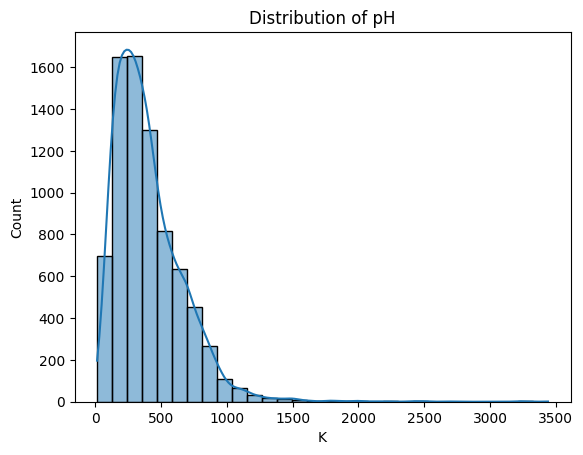

In [13]:
# Basic EDA
sns.histplot(train_df['K'], bins=30, kde=True)
plt.title('Distribution of pH')
plt.show()

# Step 6: Let's model ⏳

In [14]:
target_columns = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

In [15]:
# Feature selection
X = train_df.drop(columns=target_columns)
y = train_df[target_columns]
X_test = test_df.drop(columns=['PID',"site"])

In [16]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train = X_train.drop(columns=['PID','site'])
X_val = X_val.drop(columns=['PID','site'])

In [18]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [19]:
# Predict on validation set
predictions = model.predict(X_test)
y_pred = model.predict(X_val)

In [20]:
# Evaluate model
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}')

MAE: 159.8839, RMSE: 480.8662


## **Step 7: Generate Predictions & Submission File**

Finally, we use our trained model to generate predictions for the test dataset and save them in a CSV file.

### **Why Save Predictions?**
- Predictions are needed for submission to competitions or practical applications.
- The submission format must match the required structure.

### **Tips for Beginners**
- Ensure the column names match the required format.
- Use `to_csv(index=False)` to avoid adding unnecessary row indices.




In [21]:
test_predictions = model.predict(X_test)

In [22]:
# Split the predictions into separate columns
N_pred =  test_predictions[:, 0]  # Predictions for N
P_pred =  test_predictions[:, 1]  # Predictions for P
K_pred =  test_predictions[:, 2]  # Predictions for K
Ca_pred = test_predictions[:, 3]  # Predictions for Ca
Mg_pred = test_predictions[:, 4]  # Predictions for Mg
S_pred =  test_predictions[:, 5]  # Predictions for S
Fe_pred = test_predictions[:, 6]  # Predictions for Fe
Mn_pred = test_predictions[:, 7]  # Predictions for Mn
Zn_pred = test_predictions[:, 8]  # Predictions for Zn
Cu_pred = test_predictions[:, 9]  # Predictions for Cu
B_pred =  test_predictions[:, 10]  # Predictions for B


In [23]:
submission = pd.DataFrame({'PID': test_df['PID'], 'N': N_pred, 'P': P_pred, 'K': K_pred, 'Ca': Ca_pred, 'Mg': Mg_pred, 'S': S_pred, 'Fe': Fe_pred, 'Mn': Mn_pred, 'Zn': Zn_pred, 'Cu': Cu_pred, 'B': B_pred})
submission.head()

PID       N        P       K       Ca       Mg        S       Fe  \
0  ID_NGS9Bx  1737.4  15.4269  179.27  5956.97  1673.80  10.5150  129.765   
1  ID_YdVKXw  1385.0   8.9349  178.03  6395.83  2328.98  10.0201  119.243   
2  ID_MZAlfE  1925.5   3.9915  186.44  5452.06  1723.34   8.8659  132.232   
3  ID_GwCCMN  1869.5   1.7059  172.56  5737.37  1886.07   9.7395  136.026   
4  ID_K8sowf  1668.3   7.4646  206.42  5928.65  1336.39   8.4816  122.090   

        Mn      Zn      Cu       B  
0  147.887  1.8131  4.5936  0.2113  
1  130.930  1.5662  4.5469  0.2065  
2  161.940  1.6959  4.4342  0.2356  
3  162.780  1.8275  4.1322  0.2368  
4  128.877  2.0823  4.6589  0.2035

In [24]:
# prompt: turn submission into a 3 column file that has the column PID, Nutrient, Value

submission_melted = submission.melt(id_vars=['PID'], var_name='Nutrient', value_name='Available_Nutrients_in_ppm')
submission_melted = submission_melted.sort_values('PID')
submission_melted.head()

PID Nutrient  Available_Nutrients_in_ppm
19869  ID_002W8m       Zn                      3.3446
15033  ID_002W8m       Fe                    192.1800
2943   ID_002W8m        P                      8.0329
24705  ID_002W8m        B                      0.4422
525    ID_002W8m        N                   2473.7000

# Calculate the nutrient gaps

Transform your predicted ppm values to available nutrients (kg/ha) to determine the nutrient gaps.

We are determining the nutrients needed for Maize crops to yeild 4 tons/ha at a depth of 20cm.

Available nutrients are calculated by

`Available (kg/ha) = ppm × soil depth (cm) × bulk density (g/cm³) × 0.1`

In [25]:
# prompt: merge test_gap_df with submission_melted on PID and Nutrient
nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')


In [26]:
soil_depth = 20  # cm

# Calculate the Available_Nutrients_in_kg_ha
nutrient_df['Available_Nutrients_in_kg_ha'] = (nutrient_df['Available_Nutrients_in_ppm']
                                               * soil_depth * nutrient_df['BulkDensity'] * 0.1)

In [27]:
nutrient_df.head()

Nutrient  Required        PID  BulkDensity  Available_Nutrients_in_ppm  \
0        N     100.0  ID_NGS9Bx          1.2                   1737.4000   
1        P      40.0  ID_NGS9Bx          1.2                     15.4269   
2        K      52.0  ID_NGS9Bx          1.2                    179.2700   
3       Ca      12.0  ID_NGS9Bx          1.2                   5956.9700   
4       Mg       8.0  ID_NGS9Bx          1.2                   1673.8000   

   Available_Nutrients_in_kg_ha  
0                    4169.76000  
1                      37.02456  
2                     430.24800  
3                   14296.72800  
4                    4017.12000

In [28]:
nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

In [29]:
nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
nutrient_df = nutrient_df[['ID', 'Gap']]
nutrient_df.head()

ID          Gap
0   ID_NGS9Bx_N  -4069.76000
1   ID_NGS9Bx_P      2.97544
2   ID_NGS9Bx_K   -378.24800
3  ID_NGS9Bx_Ca -14284.72800
4  ID_NGS9Bx_Mg  -4009.12000

If a value is negative it means there is excess of that nutrient in the soil already and the farmer does not need to add any more. If the value is positive then the farmer needs to add those nutrients to the soil.

In [30]:
nutrient_df.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


### **Next Steps**
- Experiment with different models (e.g., XGBoost, LightGBM).
- Tune hyperparameters to improve performance.
- Try feature engineering to enhance the dataset.

Happy Learning! 🎯

## **Step 8: Advanced Model Experimentation**

In this section, we'll experiment with more powerful gradient boosting algorithms to potentially improve our predictions:

- **XGBoost**: Known for its speed and performance
- **LightGBM**: Efficient gradient boosting framework that uses tree-based learning
- **CatBoost**: Especially good for categorical features with minimal preprocessing

We'll also implement hyperparameter tuning to find the optimal settings for each model.

### **Why Use Multiple Models?**
- Different algorithms have different strengths and weaknesses
- Comparing multiple models helps identify the best approach for our specific data
- Ensemble methods can combine predictions for even better results

Let's install the required packages first.

In [33]:
# Import additional libraries
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import optuna
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import time
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor

### **Set up a Model Comparison Framework**

Let's create a framework to train and evaluate multiple models consistently.

In [34]:
# Function to evaluate models consistently
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    # Track training time
    start_time = time.time()

    # Fit model
    model.fit(X_train, y_train)

    # Training time
    train_time = time.time() - start_time

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Calculate errors
    train_mae = mean_absolute_error(y_train, y_pred_train)
    val_mae = mean_absolute_error(y_val, y_pred_val)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training Time: {train_time:.2f} seconds")
    print(f"Training MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}")
    print(f"Validation MAE: {val_mae:.4f}, RMSE: {val_rmse:.4f}")

    # Return the results
    return {
        'model': model,
        'name': model_name,
        'train_mae': train_mae,
        'val_mae': val_mae,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_time': train_time
    }

### **XGBoost Model with Hyperparameter Tuning**

XGBoost is an optimized gradient boosting library known for its speed and performance.

In [35]:
# Define objective function for XGBoost hyperparameter tuning
def objective_xgb(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42
    }

    # Create XGBoost MultiOutputRegressor
    xgb_model = MultiOutputRegressor(xgb.XGBRegressor(**params))

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_val)

    # Calculate MAE
    mae = mean_absolute_error(y_val, y_pred)

    return mae

# Run the hyperparameter optimization
print("Tuning XGBoost hyperparameters...")
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=10)  # Adjust n_trials as needed

print("Best XGBoost Parameters:", study_xgb.best_params)
print("Best XGBoost MAE:", study_xgb.best_value)

# Create the optimized XGBoost model
best_xgb_model = MultiOutputRegressor(xgb.XGBRegressor(**study_xgb.best_params, random_state=42))

# Evaluate XGBoost model
xgb_results = evaluate_model(best_xgb_model, X_train, X_val, y_train, y_val, "XGBoost")

[I 2025-06-04 19:30:36,727] A new study created in memory with name: no-name-87bb2450-a792-4725-8840-6f8f23e54af4


Tuning XGBoost hyperparameters...


[I 2025-06-04 19:30:53,394] Trial 0 finished with value: 165.14646911621094 and parameters: {'n_estimators': 195, 'max_depth': 8, 'learning_rate': 0.17607599370735563, 'subsample': 0.6116679505346309, 'colsample_bytree': 0.9699527088131024, 'min_child_weight': 2, 'reg_alpha': 1.6132213434986042, 'reg_lambda': 4.265019417485681}. Best is trial 0 with value: 165.14646911621094.
[I 2025-06-04 19:31:04,478] Trial 1 finished with value: 159.31715393066406 and parameters: {'n_estimators': 180, 'max_depth': 7, 'learning_rate': 0.11450349454458293, 'subsample': 0.877222559728457, 'colsample_bytree': 0.8139410584557946, 'min_child_weight': 7, 'reg_alpha': 6.021276668991247, 'reg_lambda': 8.373999442566667}. Best is trial 1 with value: 159.31715393066406.
[I 2025-06-04 19:31:27,250] Trial 2 finished with value: 163.86387634277344 and parameters: {'n_estimators': 259, 'max_depth': 9, 'learning_rate': 0.1911626465363994, 'subsample': 0.861068937063771, 'colsample_bytree': 0.9192988205370857, 'min_

Best XGBoost Parameters: {'n_estimators': 96, 'max_depth': 9, 'learning_rate': 0.10284482806143688, 'subsample': 0.8343136786022026, 'colsample_bytree': 0.6694879356594279, 'min_child_weight': 9, 'reg_alpha': 5.515677614532643, 'reg_lambda': 4.5589606072244}
Best XGBoost MAE: 158.55996704101562

XGBoost Results:
Training Time: 8.95 seconds
Training MAE: 68.9405, RMSE: 204.1221
Validation MAE: 158.5600, RMSE: 475.2001


### **LightGBM Model with Hyperparameter Tuning**

LightGBM is a gradient boosting framework that uses tree-based algorithms and is designed for efficiency and low memory usage.

In [36]:
# Define objective function for LightGBM hyperparameter tuning
def objective_lgb(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', -1, 15),  # -1 means no limit
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42
    }

    # Create LightGBM MultiOutputRegressor
    lgb_model = MultiOutputRegressor(lgb.LGBMRegressor(**params))

    # Train the model
    lgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = lgb_model.predict(X_val)

    # Calculate MAE
    mae = mean_absolute_error(y_val, y_pred)

    return mae

# Run the hyperparameter optimization
print("Tuning LightGBM hyperparameters...")
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=10)  # Adjust n_trials as needed

print("Best LightGBM Parameters:", study_lgb.best_params)
print("Best LightGBM MAE:", study_lgb.best_value)

# Create the optimized LightGBM model
best_lgb_model = MultiOutputRegressor(lgb.LGBMRegressor(**study_lgb.best_params, random_state=42))

# Evaluate LightGBM model
lgb_results = evaluate_model(best_lgb_model, X_train, X_val, y_train, y_val, "LightGBM")

[I 2025-06-04 19:33:55,572] A new study created in memory with name: no-name-12a7a164-0bc9-42d1-b8ae-71bea4b55ccc


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-04 19:33:59,114] Trial 0 finished with value: 169.01595555447085 and parameters: {'n_estimators': 452, 'max_depth': 2, 'learning_rate': 0.28793769448987, 'num_leaves': 144, 'subsample': 0.6684472899181261, 'colsample_bytree': 0.9649070594366607, 'min_child_samples': 65, 'reg_alpha': 1.2931019796874976, 'reg_lambda': 4.170327807794073}. Best is trial 0 with value: 169.01595555447085.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-04 19:34:05,870] Trial 1 finished with value: 166.7368471632389 and parameters: {'n_estimators': 418, 'max_depth': 4, 'learning_rate': 0.21951300176812513, 'num_leaves': 122, 'subsample': 0.9526876011297646, 'colsample_bytree': 0.7161665688866458, 'min_child_samples': 23, 'reg_alpha': 5.04314570709934, 'reg_lambda': 0.09652277658636077}. Best is trial 1 with value: 166.7368471632389.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-04 19:34:19,413] Trial 2 finished with value: 165.13294281334277 and parameters: {'n_estimators': 472, 'max_depth': 6, 'learning_rate': 0.15555066576866644, 'num_leaves': 34, 'subsample': 0.6944543468228556, 'colsample_bytree': 0.8180824906760907, 'min_child_samples': 36, 'reg_alpha': 5.585132641344134, 'reg_lambda': 2.0822186429607834}. Best is trial 2 with value: 165.13294281334277.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6693
[LightGBM] [Info] Number of data points in the train set: 6195, number of used features: 31
[LightGBM] [Info] Start training from score 1659.143341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-06-04 19:34:23,308] Trial 3 finished with value: 165.87801702526156 and parameters: {'n_estimators': 318, 'max_depth': 3, 'learning_rate': 0.16783539349390933, 'num_leaves': 109, 'subsample': 0.7475121426895734, 'colsample_bytree': 0.70422450873451, 'min_child_samples': 15, 'reg_alpha': 8.787160592997559, 'reg_lambda': 7.709029987561523}. Best is trial 2 with value: 165.13294281334277.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-04 19:34:32,423] Trial 4 finished with value: 165.27187968086156 and parameters: {'n_estimators': 494, 'max_depth': 4, 'learning_rate': 0.20248781712466402, 'num_leaves': 136, 'subsample': 0.8323741566967054, 'colsample_bytree': 0.9447575426820972, 'min_child_samples': 10, 'reg_alpha': 2.849399427768425, 'reg_lambda': 4.405902968604196}. Best is trial 2 with value: 165.13294281334277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-06-04 19:34:38,424] Trial 5 finished with value: 168.85370279783191 and parameters: {'n_estimators': 393, 'max_depth': 4, 'learning_rate': 0.2782397563508297, 'num_leaves': 101, 'subsample': 0.7429006346642706, 'colsample_bytree': 0.6094466382672798, 'min_child_samples': 78, 'reg_alpha': 0.6168121351179523, 'reg_lambda': 7.358636020365612}. Best is trial 2 with value: 165.13294281334277.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-04 19:34:41,805] Trial 6 finished with value: 168.87164652246565 and parameters: {'n_estimators': 471, 'max_depth': 2, 'learning_rate': 0.22076931078261955, 'num_leaves': 121, 'subsample': 0.7064508647823169, 'colsample_bytree': 0.7865863635336492, 'min_child_samples': 30, 'reg_alpha': 8.78520822810694, 'reg_lambda': 9.3267977050649}. Best is trial 2 with value: 165.13294281334277.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6693
[LightGBM] [Info] Number of data points in the train set: 6195, number of used features: 31
[LightGBM] [Info] Start training from score 1659.143341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-06-04 19:34:44,212] Trial 7 finished with value: 191.63449782856085 and parameters: {'n_estimators': 454, 'max_depth': 1, 'learning_rate': 0.19522003513527939, 'num_leaves': 84, 'subsample': 0.9428257234745379, 'colsample_bytree': 0.92076849686348, 'min_child_samples': 42, 'reg_alpha': 0.53587347277401, 'reg_lambda': 8.68868651954267}. Best is trial 2 with value: 165.13294281334277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-04 19:34:51,409] Trial 8 finished with value: 165.4393385702683 and parameters: {'n_estimators': 374, 'max_depth': 5, 'learning_rate': 0.19927603472638492, 'num_leaves': 68, 'subsample': 0.6066838758641268, 'colsample_bytree': 0.7815722030890644, 'min_child_samples': 72, 'reg_alpha': 3.064102695956037, 'reg_lambda': 2.2411763160750606}. Best is trial 2 with value: 165.13294281334277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-04 19:34:52,425] Trial 9 finished with value: 169.9370075262308 and parameters: {'n_estimators': 95, 'max_depth': 3, 'learning_rate': 0.19892703486566388, 'num_leaves': 59, 'subsample': 0.6663843706502326, 'colsample_bytree': 0.7741459457163892, 'min_child_samples': 77, 'reg_alpha': 9.784572066937265, 'reg_lambda': 7.461169829728505}. Best is trial 2 with value: 165.13294281334277.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

### **CatBoost Model with Hyperparameter Tuning**

CatBoost is especially good at handling categorical features with minimal preprocessing, and often achieves high performance out-of-the-box.

In [37]:
# Define objective function for CatBoost hyperparameter tuning
def objective_cb(trial):
    # Define hyperparameters to tune
    params = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_seed': 42,
        'verbose': False
    }

    # Create CatBoost MultiOutputRegressor
    cb_model = MultiOutputRegressor(cb.CatBoostRegressor(**params))

    # Train the model
    cb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = cb_model.predict(X_val)

    # Calculate MAE
    mae = mean_absolute_error(y_val, y_pred)

    return mae

# Run the hyperparameter optimization
print("Tuning CatBoost hyperparameters...")
study_cb = optuna.create_study(direction='minimize')
study_cb.optimize(objective_cb, n_trials=10)  # Adjust n_trials as needed

print("Best CatBoost Parameters:", study_cb.best_params)
print("Best CatBoost MAE:", study_cb.best_value)

# Create the optimized CatBoost model
best_cb_model = MultiOutputRegressor(cb.CatBoostRegressor(**study_cb.best_params, random_seed=42, verbose=False))

# Evaluate CatBoost model
cb_results = evaluate_model(best_cb_model, X_train, X_val, y_train, y_val, "CatBoost")

[I 2025-06-04 19:35:22,935] A new study created in memory with name: no-name-cd65b91b-13fc-4a33-962d-523094f30e34


Tuning CatBoost hyperparameters...


[I 2025-06-04 19:35:42,521] Trial 0 finished with value: 159.84850294737757 and parameters: {'iterations': 358, 'depth': 9, 'learning_rate': 0.11570930919359636, 'l2_leaf_reg': 1.0618751246906555, 'random_strength': 0.8932221839918761, 'bagging_temperature': 7.604691601792533, 'border_count': 35}. Best is trial 0 with value: 159.84850294737757.
[I 2025-06-04 19:35:54,112] Trial 1 finished with value: 167.52011192297604 and parameters: {'iterations': 417, 'depth': 4, 'learning_rate': 0.05160328798589473, 'l2_leaf_reg': 1.4678001243659047, 'random_strength': 4.304251984996735, 'bagging_temperature': 2.121075354383689, 'border_count': 58}. Best is trial 0 with value: 159.84850294737757.
[I 2025-06-04 19:36:02,960] Trial 2 finished with value: 166.35241742055183 and parameters: {'iterations': 205, 'depth': 6, 'learning_rate': 0.08884880572260916, 'l2_leaf_reg': 3.3877272591458762, 'random_strength': 7.200032670240731, 'bagging_temperature': 9.165079991717143, 'border_count': 199}. Best is 

Best CatBoost Parameters: {'iterations': 274, 'depth': 10, 'learning_rate': 0.16710266664760165, 'l2_leaf_reg': 3.7388803547403664, 'random_strength': 1.7002129544455675, 'bagging_temperature': 3.8070741536056376, 'border_count': 171}
Best CatBoost MAE: 159.0942182161675

CatBoost Results:
Training Time: 48.15 seconds
Training MAE: 46.3701, RMSE: 121.4760
Validation MAE: 159.0942, RMSE: 483.6212


### **Model Comparison and Selection**

Let's compare all models and select the best one for our final predictions.

In [38]:
# Combine the results
models = [xgb_results, lgb_results, cb_results]

# Add the original Random Forest results
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_results = evaluate_model(rf_model, X_train, X_val, y_train, y_val, "Random Forest")
models.append(rf_results)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': [model['name'] for model in models],
    'Validation MAE': [model['val_mae'] for model in models],
    'Validation RMSE': [model['val_rmse'] for model in models],
    'Training Time (s)': [model['train_time'] for model in models]
})

# Sort by validation MAE
comparison_df = comparison_df.sort_values('Validation MAE')
comparison_df.reset_index(drop=True, inplace=True)
comparison_df


Random Forest Results:
Training Time: 212.70 seconds
Training MAE: 59.3039, RMSE: 185.7913
Validation MAE: 159.8839, RMSE: 480.8662


Model  Validation MAE  Validation RMSE  Training Time (s)
0        XGBoost      158.559967       475.200073           8.954419
1       CatBoost      159.094218       483.621205          48.148971
2  Random Forest      159.883897       480.866212         212.698413
3       LightGBM      165.132943       497.122846          12.999498

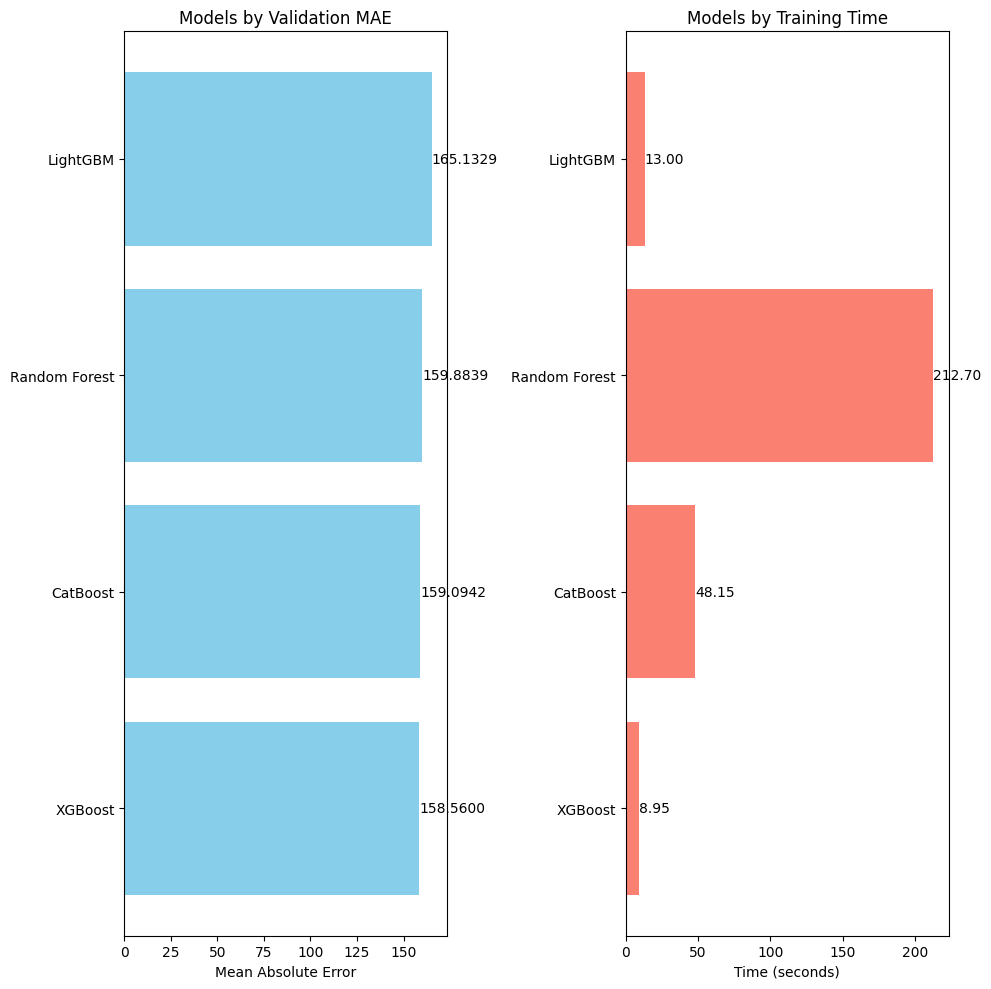

In [39]:
# Create a visualization to compare models
plt.figure(figsize=(10, 10))

# Plot Validation MAE
plt.subplot(1, 2, 1)
plt.barh(comparison_df['Model'], comparison_df['Validation MAE'], color='skyblue')
plt.title('Models by Validation MAE')
plt.xlabel('Mean Absolute Error')
for i, v in enumerate(comparison_df['Validation MAE']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center')

# Plot Training Time
plt.subplot(1, 2, 2)
plt.barh(comparison_df['Model'], comparison_df['Training Time (s)'], color='salmon')
plt.title('Models by Training Time')
plt.xlabel('Time (seconds)')
for i, v in enumerate(comparison_df['Training Time (s)']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

### **Check for Overfitting**

Overfitting occurs when a model performs well on training data but poorly on validation/test data. Let's visualize the difference between training and validation errors for each model to check for signs of overfitting.

A large gap between training and validation performance typically indicates overfitting.

In [40]:
# Create a DataFrame for overfitting analysis
overfitting_df = pd.DataFrame({
    'Model': [model['name'] for model in models],
    'Training MAE': [model['train_mae'] for model in models],
    'Validation MAE': [model['val_mae'] for model in models],
    'Difference': [model['val_mae'] - model['train_mae'] for model in models],
    'Training RMSE': [model['train_rmse'] for model in models],
    'Validation RMSE': [model['val_rmse'] for model in models]
})

# Sort by the difference between validation and training MAE
overfitting_df = overfitting_df.sort_values('Difference', ascending=False)
overfitting_df

Model  Training MAE  Validation MAE  Difference  Training RMSE  \
2       CatBoost     46.370069      159.094218  112.724149     121.475950   
1       LightGBM     52.848659      165.132943  112.284283     147.840481   
3  Random Forest     59.303916      159.883897  100.579980     185.791337   
0        XGBoost     68.940536      158.559967   89.619431     204.122091   

   Validation RMSE  
2       483.621205  
1       497.122846  
3       480.866212  
0       475.200073

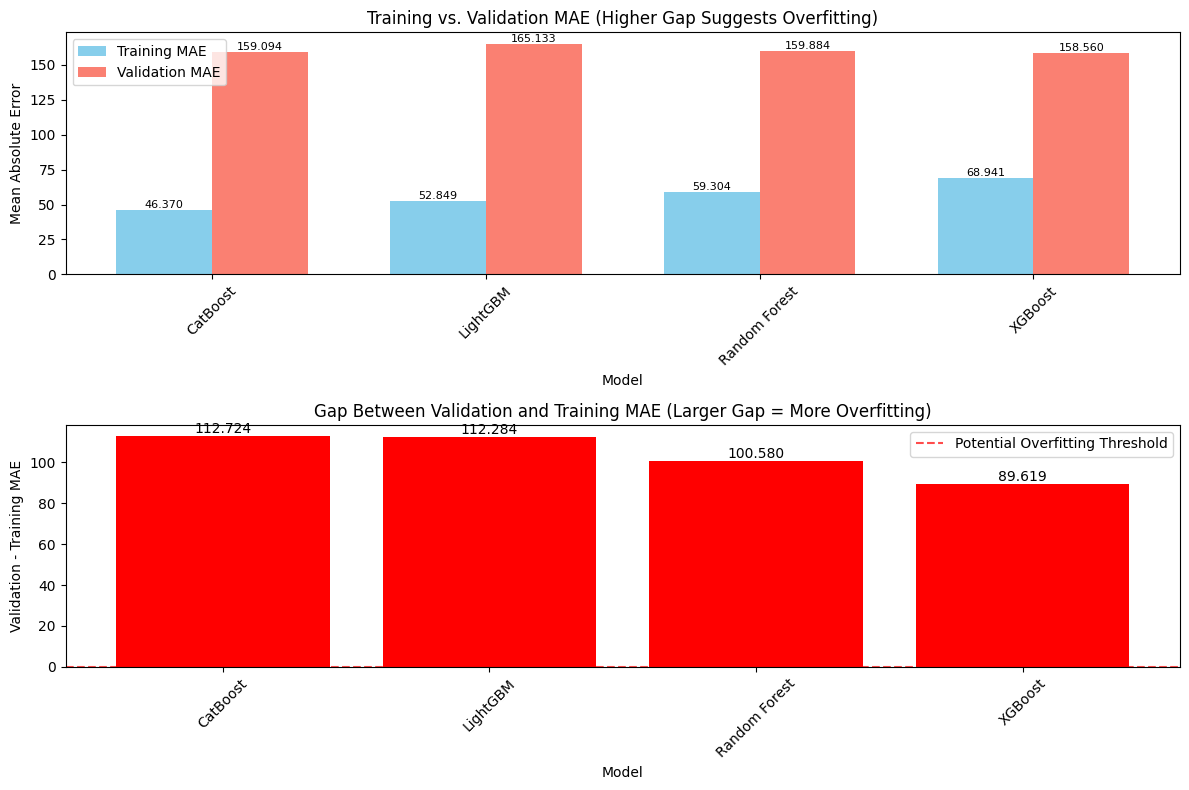

In [41]:
# Visualize overfitting
plt.figure(figsize=(12, 8))

# Plot MAE comparison
plt.subplot(2, 1, 1)
x = np.arange(len(models))
width = 0.35

# Get model names in the right order
model_names = overfitting_df['Model']

train_mae_bars = plt.bar(x - width/2, overfitting_df['Training MAE'], width, label='Training MAE', color='skyblue')
val_mae_bars = plt.bar(x + width/2, overfitting_df['Validation MAE'], width, label='Validation MAE', color='salmon')

plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Training vs. Validation MAE (Higher Gap Suggests Overfitting)')
plt.xticks(x, model_names, rotation=45)
plt.legend()

# Add value labels on the bars
for i, bar in enumerate(train_mae_bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{overfitting_df["Training MAE"].iloc[i]:.3f}',
             ha='center', va='bottom', fontsize=8)

for i, bar in enumerate(val_mae_bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{overfitting_df["Validation MAE"].iloc[i]:.3f}',
             ha='center', va='bottom', fontsize=8)

# Plot the gap (difference) between validation and training MAE
plt.subplot(2, 1, 2)
plt.bar(model_names, overfitting_df['Difference'], color=['red' if diff > 0.1 else 'green' for diff in overfitting_df['Difference']])
plt.axhline(y=0.1, color='r', linestyle='--', alpha=0.7, label='Potential Overfitting Threshold')
plt.xlabel('Model')
plt.ylabel('Validation - Training MAE')
plt.title('Gap Between Validation and Training MAE (Larger Gap = More Overfitting)')
plt.xticks(rotation=45)
plt.legend()

# Add value labels
for i, diff in enumerate(overfitting_df['Difference']):
    plt.text(i, diff + 0.005, f'{diff:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Generate Predictions from All Models**

Instead of just using the best model, let's generate predictions from all models and save separate submission files for each one. This allows us to compare different model results on the test set.

In [42]:
# Function to generate and save submission from a model or predictions
def generate_submission(model_or_predictions, model_name):
    print(f"\nGenerating submission for {model_name}...")

    # Check if we're given a model or pre-computed predictions
    if hasattr(model_or_predictions, 'predict'):
        # It's a model, generate predictions
        predictions = model_or_predictions.predict(X_test)
    else:
        # It's pre-computed predictions
        predictions = model_or_predictions

    # Create the submission DataFrame
    submission_df = pd.DataFrame({
        'PID': test_df['PID'],
        'N': predictions[:, 0],
        'P': predictions[:, 1],
        'K': predictions[:, 2],
        'Ca': predictions[:, 3],
        'Mg': predictions[:, 4],
        'S': predictions[:, 5],
        'Fe': predictions[:, 6],
        'Mn': predictions[:, 7],
        'Zn': predictions[:, 8],
        'Cu': predictions[:, 9],
        'B': predictions[:, 10]
    })

    # Convert to the 3-column format
    submission_melted = submission_df.melt(
        id_vars=['PID'],
        var_name='Nutrient',
        value_name='Available_Nutrients_in_ppm'
    )
    submission_melted = submission_melted.sort_values('PID')

    # Merge with test gap data
    nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')

    # Calculate available nutrients in kg/ha
    soil_depth = 20  # cm
    nutrient_df['Available_Nutrients_in_kg_ha'] = (
        nutrient_df['Available_Nutrients_in_ppm'] * soil_depth * nutrient_df['BulkDensity'] * 0.1
    )

    # Calculate the nutrient gap
    nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

    # Format the final submission
    nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
    final_submission = nutrient_df[['ID', 'Gap']]

    # Create filename
    filename = f"submission_{model_name.replace(' ', '_').lower()}.csv"

    # Save the submission file
    final_submission.to_csv(filename, index=False)
    print(f"Saved submission for {model_name} as {filename}")

    return final_submission

### **Generate Submissions for All Models**

Now let's create submission files for each of our models to compare their performance.

In [43]:
# Dictionary to store all submissions
all_submissions = {}

# Generate submissions for each model
for model_result in models:
    model = model_result['model']
    model_name = model_result['name']
    submission = generate_submission(model, model_name)
    all_submissions[model_name] = submission


Generating submission for XGBoost...
Saved submission for XGBoost as submission_xgboost.csv

Generating submission for LightGBM...
Saved submission for LightGBM as submission_lightgbm.csv

Generating submission for CatBoost...
Saved submission for CatBoost as submission_catboost.csv

Generating submission for Random Forest...
Saved submission for Random Forest as submission_random_forest.csv


### **Create an Ensemble Submission (Average of All Models)**

Ensemble methods often produce more robust results by combining predictions from multiple models. Let's create an ensemble submission by averaging the predictions from all our models.

In [44]:
# Create a list to store all model predictions
all_model_predictions = []

# Generate predictions from each model
for model_result in models:
    model = model_result['model']
    predictions = model.predict(X_test)
    all_model_predictions.append(predictions)

# Average the predictions from all models
ensemble_predictions = np.mean(all_model_predictions, axis=0)

# Generate submission using the ensemble predictions (directly pass predictions)
ensemble_submission = generate_submission(ensemble_predictions, "Ensemble_Average")


Generating submission for Ensemble_Average...
Saved submission for Ensemble_Average as submission_ensemble_average.csv


In [45]:
# Create weights based on inverse of validation MAE (better models get higher weights)
val_maes = np.array([model['val_mae'] for model in models])
weights = 1 / val_maes
# Normalize weights to sum to 1
weights = weights / weights.sum()

print("Model weights for weighted ensemble:")
for i, model_result in enumerate(models):
    print(f"{model_result['name']}: {weights[i]:.4f}")

# Create weighted predictions
weighted_ensemble_predictions = np.zeros_like(all_model_predictions[0])
for i, predictions in enumerate(all_model_predictions):
    weighted_ensemble_predictions += weights[i] * predictions

# Generate submission using the weighted ensemble predictions (directly pass predictions)
weighted_ensemble_submission = generate_submission(weighted_ensemble_predictions, "Weighted_Ensemble")

Model weights for weighted ensemble:
XGBoost: 0.2533
LightGBM: 0.2432
CatBoost: 0.2524
Random Forest: 0.2512

Generating submission for Weighted_Ensemble...
Saved submission for Weighted_Ensemble as submission_weighted_ensemble.csv


In [46]:
import os

# List all submission files
submission_files = [f for f in os.listdir() if f.startswith("submission_") or f == "advanced_model_submission.csv"]

print("\nAvailable submission files:")
for filename in submission_files:
    print(f"- {filename}")


Available submission files:
- submission_ensemble_average.csv
- submission_catboost.csv
- submission_xgboost.csv
- submission_weighted_ensemble.csv
- submission_random_forest.csv
- submission_lightgbm.csv


## **Addressing Overfitting in Our Models**

Our analysis has shown significant overfitting in all models. Let's implement several techniques to address this issue:

1. **Cross-validation**: Replace single train-test split with k-fold cross-validation
2. **Stronger regularization**: Apply more aggressive regularization to all models
3. **Early stopping**: Prevent models from learning noise in the data
4. **Feature selection**: Reduce model complexity by using only the most relevant features
5. **Data augmentation**: Add slight noise to training data to improve generalization

Let's implement these strategies one by one.

In [47]:
# Import additional libraries for addressing overfitting
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.pipeline import Pipeline

### **1. Implement Feature Selection**

Let's first identify and select only the most important features to reduce model complexity.

In [48]:
# Identify the most important features using Random Forest
def select_important_features(X, y, threshold=0.01):
    # Create a Random Forest model for feature importance
    feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train on the first target only to get feature importances
    feature_selector.fit(X, y.iloc[:, 0])

    # Get feature importances
    importances = feature_selector.feature_importances_

    # Create a DataFrame of features and their importance scores
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("Top 15 features by importance:")
    print(feature_importance.head(15))

    # Select features with importance > threshold
    important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()
    print(f"Selected {len(important_features)} features out of {X.shape[1]}")

    return important_features

# Apply feature selection
important_features = select_important_features(X_train, y_train)

# Update datasets with selected features only
X_train_selected = X_train[important_features]
X_val_selected = X_val[important_features]
X_test_selected = X_test[important_features]

Top 15 features by importance:
   Feature  Importance
2       pH    0.224272
14    lstd    0.093039
23    ph20    0.078577
26   soc20    0.061545
1      lat    0.039856
17     mb2    0.039195
0      lon    0.037243
10    dows    0.030403
5    bio12    0.027207
20    mdem    0.022880
15    lstn    0.022344
11  ecec20    0.020536
8       bp    0.020102
6    bio15    0.020054
21    para    0.018940
Selected 30 features out of 31


### **2. Implement Proper Cross-Validation**

Let's replace the single train-validation split with k-fold cross-validation for more robust model evaluation.

In [49]:
# Function to evaluate models with cross-validation
def evaluate_model_with_cv(model, X, y, model_name, cv=5):
    # Define cross-validation strategy
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)

    # Lists to store metrics for each fold
    mae_scores = []
    rmse_scores = []
    fold_predictions = []

    # Perform cross-validation
    print(f"\nPerforming {cv}-fold cross-validation for {model_name}...")

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        # Train model
        model.fit(X_fold_train, y_fold_train)

        # Make predictions
        y_fold_pred = model.predict(X_fold_val)
        fold_predictions.append((val_idx, y_fold_pred))

        # Calculate metrics
        fold_mae = mean_absolute_error(y_fold_val, y_fold_pred)
        fold_rmse = np.sqrt(mean_squared_error(y_fold_val, y_fold_pred))

        mae_scores.append(fold_mae)
        rmse_scores.append(fold_rmse)

        print(f"Fold {fold+1}: MAE = {fold_mae:.4f}, RMSE = {fold_rmse:.4f}")

    # Calculate average metrics
    avg_mae = np.mean(mae_scores)
    avg_rmse = np.mean(rmse_scores)
    std_mae = np.std(mae_scores)

    print(f"\n{model_name} Cross-Validation Results:")
    print(f"Average MAE: {avg_mae:.4f} ± {std_mae:.4f}")
    print(f"Average RMSE: {avg_rmse:.4f}")

    # Final training on all data
    model.fit(X, y)

    return {
        'model': model,
        'name': model_name,
        'cv_mae': avg_mae,
        'cv_rmse': avg_rmse,
        'mae_std': std_mae,
        'fold_predictions': fold_predictions
    }

### **3. Data Augmentation**

Let's implement data augmentation by adding slight noise to the training data to improve model generalization.

In [50]:
# Function to augment data by adding noise
def augment_data(X, y, noise_level=0.05, n_samples=1):
    X_augmented = X.copy()
    y_augmented = y.copy()

    for i in range(n_samples):
        # Add random noise to features
        noise_X = X * (1 + np.random.normal(0, noise_level, size=X.shape))

        # Add smaller random noise to targets
        noise_y = y * (1 + np.random.normal(0, noise_level/2, size=y.shape))

        # Append to original data
        X_augmented = pd.concat([X_augmented, pd.DataFrame(noise_X, columns=X.columns)])
        y_augmented = pd.concat([y_augmented, pd.DataFrame(noise_y, columns=y.columns)])

    print(f"Augmented data: {X.shape} → {X_augmented.shape}")
    return X_augmented, y_augmented

# Apply data augmentation (only if dataset is small)
if X_train_selected.shape[0] < 1000:  # Only augment if dataset is small
    X_train_augmented, y_train_augmented = augment_data(X_train_selected, y_train, noise_level=0.03, n_samples=2)
else:
    X_train_augmented, y_train_augmented = X_train_selected, y_train
    print("Dataset already large enough. Skipping augmentation.")

Dataset already large enough. Skipping augmentation.


### **4. Define Anti-Overfitting Hyperparameters for Models**

Let's redefine our hyperparameter tuning with a focus on preventing overfitting.

In [51]:
# Define objective function for XGBoost hyperparameter tuning with anti-overfitting focus
def objective_xgb_anti_overfit(trial):
    # Define hyperparameters with anti-overfitting focus
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 7),  # Reduced max depth
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),  # Lower learning rates
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),  # Subsampling for variance reduction
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),  # Feature subsampling
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 15),  # Increased min_child_weight
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 15.0),  # Stronger L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 15.0),  # Stronger L2 regularization
        'gamma': trial.suggest_float('gamma', 0.1, 10.0),  # Minimum loss reduction for split
    }

    # Create XGBoost with early stopping
    base_model = xgb.XGBRegressor(
        **params,
        early_stopping_rounds=20,
        eval_metric='mae'
    )

    # Use MultiOutputRegressor for multiple targets
    model = MultiOutputRegressor(base_model)

    # Use cross-validation for a more robust estimate
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in cv.split(X_train_augmented):
        X_cv_train, X_cv_val = X_train_augmented.iloc[train_idx], X_train_augmented.iloc[val_idx]
        y_cv_train, y_cv_val = y_train_augmented.iloc[train_idx], y_train_augmented.iloc[val_idx]

        # Create eval set for each XGBRegressor in the MultiOutputRegressor
        # This is complex with MultiOutputRegressor, so we'll train manually for each target
        preds = np.zeros((X_cv_val.shape[0], y_cv_val.shape[1]))

        for i in range(y_cv_val.shape[1]):  # For each target
            # Create a single XGBRegressor
            single_model = xgb.XGBRegressor(**params, random_state=42)

            # Train with early stopping
            single_model.fit(
                X_cv_train, y_cv_train.iloc[:, i],
                eval_set=[(X_cv_val, y_cv_val.iloc[:, i])],
                early_stopping_rounds=20,
                verbose=False
            )

            # Predict
            preds[:, i] = single_model.predict(X_cv_val)

        # Calculate MAE for this fold
        fold_mae = mean_absolute_error(y_cv_val, preds)
        cv_scores.append(fold_mae)

    # Return the average MAE across all folds
    return np.mean(cv_scores)

# Define similar objective functions for LightGBM and CatBoost with anti-overfitting focus
def objective_lgb_anti_overfit(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 7),  # Smaller trees
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),  # Slower learning
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),  # Fewer leaves
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),  # Row subsampling
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),  # Column subsampling
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),  # Min samples per leaf
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 15.0),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 15.0),  # L2 regularization
        'random_state': 42
    }

    # Similar cross-validation approach as XGBoost
    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in cv.split(X_train_augmented):
        X_cv_train, X_cv_val = X_train_augmented.iloc[train_idx], X_train_augmented.iloc[val_idx]
        y_cv_train, y_cv_val = y_train_augmented.iloc[train_idx], y_train_augmented.iloc[val_idx]

        preds = np.zeros((X_cv_val.shape[0], y_cv_val.shape[1]))

        for i in range(y_cv_val.shape[1]):
            single_model = lgb.LGBMRegressor(**params)
            single_model.fit(
                X_cv_train, y_cv_train.iloc[:, i],
                eval_set=[(X_cv_val, y_cv_val.iloc[:, i])],
                # early_stopping_rounds=20,
                # verbose=False
            )
            preds[:, i] = single_model.predict(X_cv_val)

        fold_mae = mean_absolute_error(y_cv_val, preds)
        cv_scores.append(fold_mae)

    return np.mean(cv_scores)

def objective_cb_anti_overfit(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'depth': trial.suggest_int('depth', 2, 7),  # Shallower trees
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),  # Lower learning rates
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 15.0),  # Stronger L2
        'random_strength': trial.suggest_float('random_strength', 0.5, 10.0),  # Randomization
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.5, 10.0),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 5, 15),
        'random_seed': 42,
        'verbose': False
    }

    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in cv.split(X_train_augmented):
        X_cv_train, X_cv_val = X_train_augmented.iloc[train_idx], X_train_augmented.iloc[val_idx]
        y_cv_train, y_cv_val = y_train_augmented.iloc[train_idx], y_train_augmented.iloc[val_idx]

        preds = np.zeros((X_cv_val.shape[0], y_cv_val.shape[1]))

        for i in range(y_cv_val.shape[1]):
            single_model = cb.CatBoostRegressor(**params)
            single_model.fit(
                X_cv_train, y_cv_train.iloc[:, i],
                eval_set=[(X_cv_val, y_cv_val.iloc[:, i])],
                early_stopping_rounds=20,
                verbose=False
            )
            preds[:, i] = single_model.predict(X_cv_val)

        fold_mae = mean_absolute_error(y_cv_val, preds)
        cv_scores.append(fold_mae)

    return np.mean(cv_scores)

### **5. Define Anti-Overfitting Random Forest**

Let's also create a Random Forest model with anti-overfitting settings.

In [52]:
# Define Random Forest with anti-overfitting parameters
rf_anti_overfit = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=200,  # More trees for stability
    max_depth=8,       # Limit depth to prevent overfitting
    min_samples_split=5,  # Require more samples to split
    min_samples_leaf=4,   # Require more samples in leaves
    max_features='sqrt',  # Use subset of features for each split
    bootstrap=True,       # Use bootstrapping
    oob_score=True,       # Use out-of-bag samples for validation
    random_state=42
))

# Evaluate Random Forest with cross-validation
rf_results = evaluate_model_with_cv(rf_anti_overfit, X_train_augmented, y_train_augmented, "Random Forest")


Performing 5-fold cross-validation for Random Forest...
Fold 1: MAE = 186.6029, RMSE = 553.8324
Fold 2: MAE = 188.4068, RMSE = 603.0178
Fold 3: MAE = 181.8024, RMSE = 545.1600
Fold 4: MAE = 186.6219, RMSE = 593.1447
Fold 5: MAE = 176.7953, RMSE = 497.5445

Random Forest Cross-Validation Results:
Average MAE: 184.0459 ± 4.2378
Average RMSE: 558.5399


### **6. Run Optuna for Each Model with Anti-Overfitting Settings**

In [53]:
# Run XGBoost optimization with anti-overfitting settings
print("Tuning XGBoost with anti-overfitting settings...")
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb_anti_overfit, n_trials=10)  # Adjust n_trials as needed

print("Best XGBoost Anti-Overfitting Parameters:", study_xgb.best_params)
print("Best XGBoost MAE:", study_xgb.best_value)

# Create and evaluate optimized XGBoost model
best_xgb_params = study_xgb.best_params.copy()
best_xgb_params['random_state'] = 42
best_xgb_base = xgb.XGBRegressor(**best_xgb_params)
best_xgb_model = MultiOutputRegressor(best_xgb_base)

xgb_results = evaluate_model_with_cv(best_xgb_model, X_train_augmented, y_train_augmented, "XGBoost")

[I 2025-06-04 19:48:38,970] A new study created in memory with name: no-name-a987a2c7-9916-47b7-85de-d43a18b705ef
[W 2025-06-04 19:48:38,976] Trial 0 failed with parameters: {'n_estimators': 72, 'max_depth': 4, 'learning_rate': 0.0943428149683632, 'subsample': 0.6766781302441455, 'colsample_bytree': 0.6692627207864195, 'min_child_weight': 10, 'reg_alpha': 8.28851970700196, 'reg_lambda': 11.507160217280967, 'gamma': 5.414638482405552} because of the following error: TypeError("XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'").
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-51-6e7aea6cbe55>", line 43, in objective_xgb_anti_overfit
    single_model.fit(
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^

Tuning XGBoost with anti-overfitting settings...


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [54]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

def objective_xgb_anti_overfit(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
        "gamma": trial.suggest_float("gamma", 0, 10),
        "random_state": 42
    }

    xgb_model = MultiOutputRegressor(XGBRegressor(**param))

    # Remove early_stopping_rounds from here
    xgb_model.fit(X_train_augmented, y_train_augmented)

    preds = xgb_model.predict(X_valid_augmented)
    score = mean_absolute_error(y_valid_augmented, preds)
    return score


In [55]:
# Run LightGBM optimization with anti-overfitting settings
print("Tuning LightGBM with anti-overfitting settings...")
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb_anti_overfit, n_trials=10)  # Adjust n_trials as needed

print("Best LightGBM Anti-Overfitting Parameters:", study_lgb.best_params)
print("Best LightGBM MAE:", study_lgb.best_value)

# Create and evaluate optimized LightGBM model
best_lgb_params = study_lgb.best_params.copy()
best_lgb_params['random_state'] = 42
best_lgb_base = lgb.LGBMRegressor(**best_lgb_params)
best_lgb_model = MultiOutputRegressor(best_lgb_base)

lgb_results = evaluate_model_with_cv(best_lgb_model, X_train_augmented, y_train_augmented, "LightGBM")

[I 2025-06-04 19:54:55,271] A new study created in memory with name: no-name-ca8fb7f8-037a-4501-92da-638c8d039797


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-04 19:55:23,527] Trial 0 finished with value: 163.2198158210683 and parameters: {'n_estimators': 258, 'max_depth': 7, 'learning_rate': 0.09201306265169956, 'num_leaves': 43, 'subsample': 0.6643603540871406, 'colsample_bytree': 0.8659848930351445, 'min_child_samples': 39, 'reg_alpha': 0.8449709659288445, 'reg_lambda': 5.507576634134009}. Best is trial 0 with value: 163.2198158210683.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-04 19:55:42,033] Trial 1 finished with value: 162.5427323036187 and parameters: {'n_estimators': 183, 'max_depth': 6, 'learning_rate': 0.07780646785920954, 'num_leaves': 29, 'subsample': 0.7013671677614391, 'colsample_bytree': 0.8503616731770253, 'min_child_samples': 19, 'reg_alpha': 7.980875048461537, 'reg_lambda': 6.458351631602811}. Best is trial 1 with value: 162.5427323036187.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-04 19:56:05,305] Trial 2 finished with value: 162.86646629637778 and parameters: {'n_estimators': 288, 'max_depth': 5, 'learning_rate': 0.08893534546784333, 'num_leaves': 38, 'subsample': 0.8359332046975303, 'colsample_bytree': 0.5774159947145487, 'min_child_samples': 16, 'reg_alpha': 0.354188148802031, 'reg_lambda': 4.59331130940632}. Best is trial 1 with value: 162.5427323036187.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-06-04 19:56:15,867] Trial 3 finished with value: 179.20974380451864 and parameters: {'n_estimators': 164, 'max_depth': 4, 'learning_rate': 0.023963220364390376, 'num_leaves': 26, 'subsample': 0.5292356292234667, 'colsample_bytree': 0.7314805998710313, 'min_child_samples': 45, 'reg_alpha': 9.131487278748354, 'reg_lambda': 9.332817506956609}. Best is trial 1 with value: 162.5427323036187.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-th

[I 2025-06-04 19:56:45,426] Trial 4 finished with value: 161.77732645562992 and parameters: {'n_estimators': 234, 'max_depth': 6, 'learning_rate': 0.04824335426147413, 'num_leaves': 40, 'subsample': 0.5285102668655215, 'colsample_bytree': 0.800562317407001, 'min_child_samples': 11, 'reg_alpha': 0.24370015546005194, 'reg_lambda': 10.693151167177206}. Best is trial 4 with value: 161.77732645562992.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-04 19:56:58,843] Trial 5 finished with value: 172.27280074719852 and parameters: {'n_estimators': 207, 'max_depth': 6, 'learning_rate': 0.02668878786143725, 'num_leaves': 12, 'subsample': 0.8112223844002386, 'colsample_bytree': 0.8151904479592985, 'min_child_samples': 32, 'reg_alpha': 3.4260050140476634, 'reg_lambda': 8.621777465389282}. Best is trial 4 with value: 161.77732645562992.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6389
[LightGBM] [Info] Number of data points in the train set: 4130, number of used features: 30
[LightGBM] [Info] Start training from score 1660.187167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-06-04 19:57:11,881] Trial 6 finished with value: 164.69357770963208 and parameters: {'n_estimators': 140, 'max_depth': 6, 'learning_rate': 0.06860287138303839, 'num_leaves': 20, 'subsample': 0.7156689924629267, 'colsample_bytree': 0.6824241292202397, 'min_child_samples': 23, 'reg_alpha': 7.245894507677022, 'reg_lambda': 13.514052599511128}. Best is trial 4 with value: 161.77732645562992.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6389
[LightGBM] [Info] Number of data points in the train set: 4130, number of used features: 30
[LightGBM] [Info] Start training from score 1660.187167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-06-04 19:57:17,350] Trial 7 finished with value: 172.69976266274693 and parameters: {'n_estimators': 128, 'max_depth': 3, 'learning_rate': 0.09906380633723236, 'num_leaves': 23, 'subsample': 0.7950129891120091, 'colsample_bytree': 0.7928108070865763, 'min_child_samples': 15, 'reg_alpha': 10.051014575642217, 'reg_lambda': 5.2466727090892284}. Best is trial 4 with value: 161.77732645562992.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-04 19:57:22,792] Trial 8 finished with value: 174.81047833590637 and parameters: {'n_estimators': 122, 'max_depth': 3, 'learning_rate': 0.08284233435814749, 'num_leaves': 38, 'subsample': 0.8436342913753405, 'colsample_bytree': 0.7022962199712135, 'min_child_samples': 24, 'reg_alpha': 6.890201323032896, 'reg_lambda': 1.8176579180895243}. Best is trial 4 with value: 161.77732645562992.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-04 19:57:28,858] Trial 9 finished with value: 170.5140604883554 and parameters: {'n_estimators': 68, 'max_depth': 5, 'learning_rate': 0.06796588499416456, 'num_leaves': 22, 'subsample': 0.5315258205378401, 'colsample_bytree': 0.6811382491855874, 'min_child_samples': 19, 'reg_alpha': 8.765968467944715, 'reg_lambda': 8.535522358166673}. Best is trial 4 with value: 161.77732645562992.


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [56]:
# Run CatBoost optimization with anti-overfitting settings
print("Tuning CatBoost with anti-overfitting settings...")
study_cb = optuna.create_study(direction='minimize')
study_cb.optimize(objective_cb_anti_overfit, n_trials=10)  # Adjust n_trials as needed

print("Best CatBoost Anti-Overfitting Parameters:", study_cb.best_params)
print("Best CatBoost MAE:", study_cb.best_value)

# Create and evaluate optimized CatBoost model
best_cb_params = study_cb.best_params.copy()
best_cb_params['random_seed'] = 42
best_cb_base = cb.CatBoostRegressor(**best_cb_params, verbose=False)
best_cb_model = MultiOutputRegressor(best_cb_base)

cb_results = evaluate_model_with_cv(best_cb_model, X_train_augmented, y_train_augmented, "CatBoost")

[I 2025-06-04 19:58:47,095] A new study created in memory with name: no-name-87827a27-1930-43c4-938c-a9bff9889529


Tuning CatBoost with anti-overfitting settings...


[I 2025-06-04 19:59:08,525] Trial 0 finished with value: 187.16221422557177 and parameters: {'iterations': 170, 'depth': 5, 'learning_rate': 0.03326786454856922, 'l2_leaf_reg': 13.252742814780586, 'random_strength': 3.6911489258857406, 'bagging_temperature': 7.307652369672199, 'leaf_estimation_iterations': 10}. Best is trial 0 with value: 187.16221422557177.
[I 2025-06-04 19:59:27,128] Trial 1 finished with value: 195.10043808804076 and parameters: {'iterations': 159, 'depth': 5, 'learning_rate': 0.028725911953847796, 'l2_leaf_reg': 7.354323526124641, 'random_strength': 5.833145087844354, 'bagging_temperature': 4.919531940224675, 'leaf_estimation_iterations': 6}. Best is trial 0 with value: 187.16221422557177.
[I 2025-06-04 20:00:04,512] Trial 2 finished with value: 178.12376336218028 and parameters: {'iterations': 289, 'depth': 5, 'learning_rate': 0.03348126970869067, 'l2_leaf_reg': 8.828155517671354, 'random_strength': 4.639409477613469, 'bagging_temperature': 6.147293388054613, 'lea

Best CatBoost Anti-Overfitting Parameters: {'iterations': 298, 'depth': 7, 'learning_rate': 0.05242392804810102, 'l2_leaf_reg': 7.756442145656545, 'random_strength': 5.049548969508485, 'bagging_temperature': 7.679827674999983, 'leaf_estimation_iterations': 13}
Best CatBoost MAE: 163.665193066826

Performing 5-fold cross-validation for CatBoost...
Fold 1: MAE = 165.8301, RMSE = 505.9492
Fold 2: MAE = 168.6060, RMSE = 555.2242
Fold 3: MAE = 157.8809, RMSE = 465.8396
Fold 4: MAE = 165.2886, RMSE = 539.0834
Fold 5: MAE = 160.1663, RMSE = 458.0015

CatBoost Cross-Validation Results:
Average MAE: 163.5544 ± 3.9338
Average RMSE: 504.8196


### **7. Model Comparison After Anti-Overfitting Measures**

Let's compare all models after applying anti-overfitting techniques.

In [60]:
# Combine the results
anti_overfit_models = [rf_results, xgb_results, lgb_results, cb_results]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': [model['name'] for model in anti_overfit_models],
    'Cross-Val MAE': [model.get('cv_mae', np.nan) for model in anti_overfit_models],

    'Cross-Val RMSE': [model['cv_rmse',np.nan] for model in anti_overfit_models],
    'MAE Std Dev': [model['mae_std'] for model in anti_overfit_models]
})

# Sort by validation MAE
comparison_df = comparison_df.sort_values('Cross-Val MAE')
comparison_df.reset_index(drop=True, inplace=True)
comparison_df

KeyError: ('cv_rmse', nan)

<Figure size 1200x800 with 0 Axes>

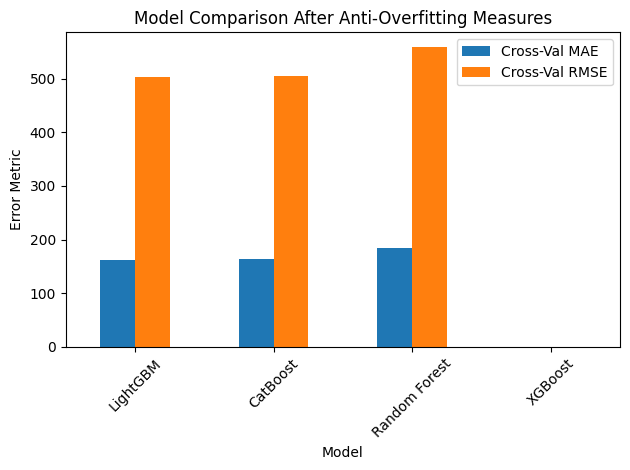

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Combine the results (assuming anti_overfit_models contains model results)
fit_models = [rf_results, xgb_results, lgb_results, cb_results]
anti_overfit_models = fit_models  # Use this if you need both references

# Create comparison DataFrame with error handling
comparison_df = pd.DataFrame({
    'Model': [model['name'] for model in anti_overfit_models],
    'Cross-Val MAE': [model.get('cv_mae', np.nan) for model in anti_overfit_models],
    'Cross-Val RMSE': [model.get('cv_rmse', np.nan) for model in anti_overfit_models],  # Fixed key and column name
    'MAE Std Dev': [model.get('mae_std', np.nan) for model in anti_overfit_models]  # Safer .get()
})

# Sort by validation MAE
comparison_df = comparison_df.sort_values('Cross-Val MAE')
comparison_df.reset_index(drop=True, inplace=True)

# Visualize model performance
plt.figure(figsize=(12, 8))
ax = comparison_df.set_index('Model').plot(kind='bar', y=['Cross-Val MAE', 'Cross-Val RMSE'],
                                         yerr=comparison_df['MAE Std Dev'], capsize=4)
plt.title('Model Comparison After Anti-Overfitting Measures')
plt.ylabel('Error Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

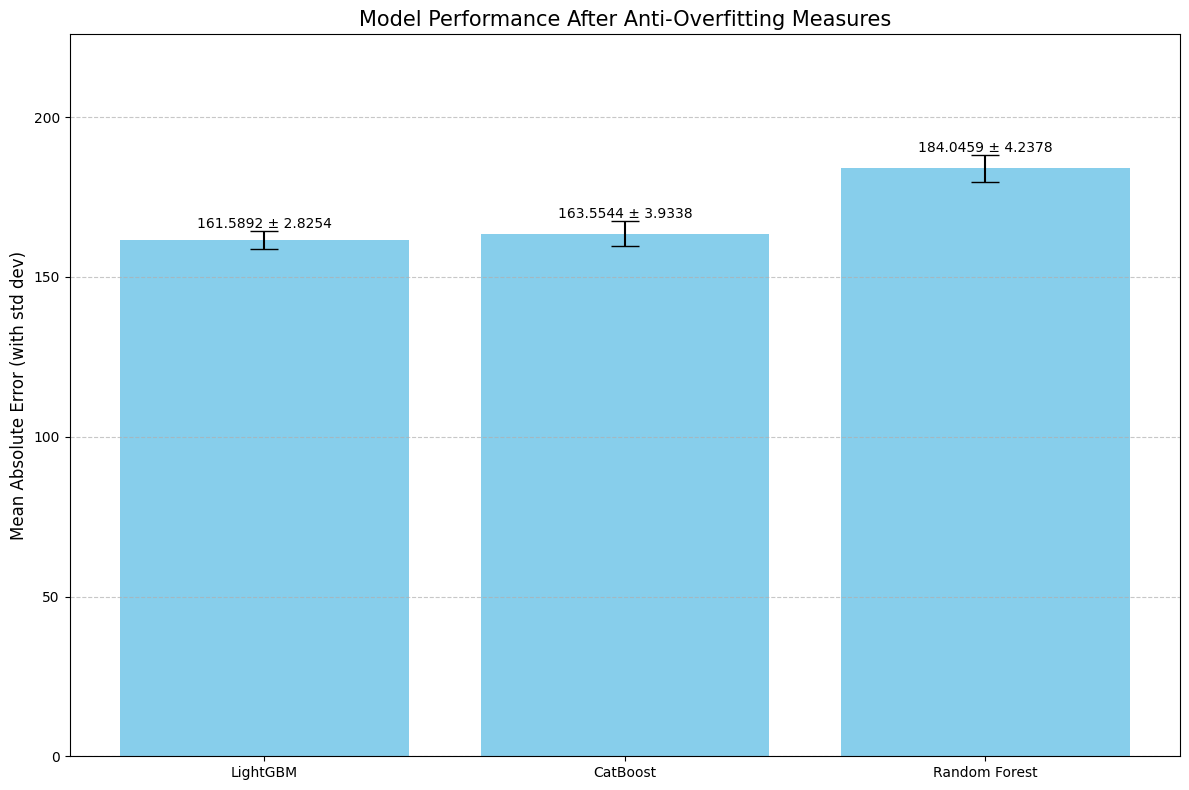

In [62]:
# Visualize model performance after anti-overfitting measures
plt.figure(figsize=(12, 8))

# Plot Cross-Val MAE with error bars
plt.subplot(1, 1, 1)
model_names = comparison_df['Model']
mae_values = comparison_df['Cross-Val MAE']
mae_stds = comparison_df['MAE Std Dev']

bars = plt.bar(model_names, mae_values, yerr=mae_stds, capsize=10, color='skyblue')
plt.title('Model Performance After Anti-Overfitting Measures', fontsize=15)
plt.ylabel('Mean Absolute Error (with std dev)', fontsize=12)
plt.ylim(0, max(mae_values + mae_stds) * 1.2)  # Add some space for the error bars

# Add values on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + mae_stds[i] + 0.01,
             f'{mae_values[i]:.4f} ± {mae_stds[i]:.4f}',
             ha='center', va='bottom', fontsize=10, rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **8. Learning Curves Analysis**

Let's plot learning curves to verify that our anti-overfitting measures are working.

Learning Curves Analysis

Random Forest Learning Curve:


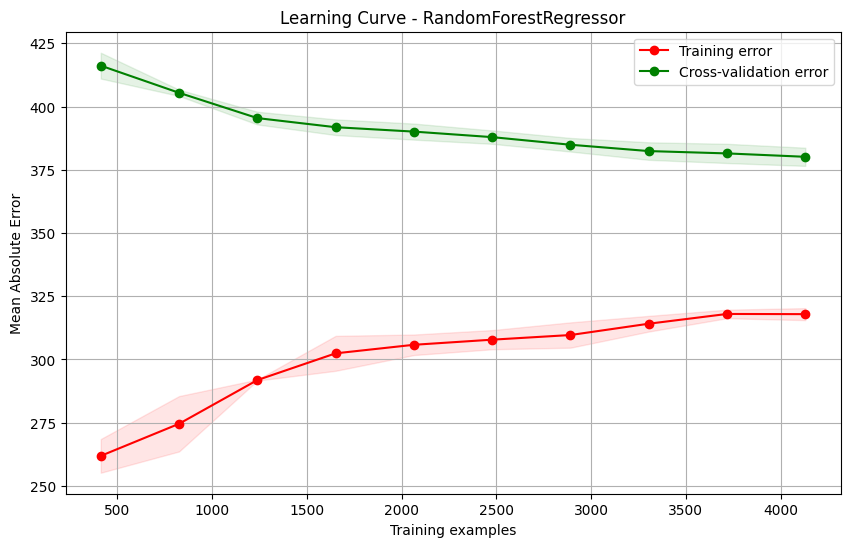

Final train error: 317.8984
Final validation error: 380.1158
Gap between train and validation: 62.2174

XGBoost Learning Curve:


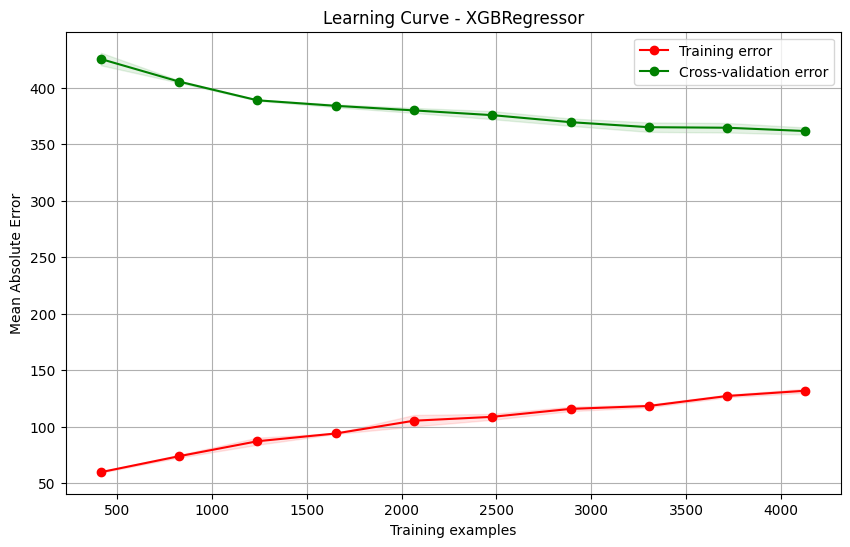

Final train error: 131.7725
Final validation error: 361.7754
Gap between train and validation: 230.0029

LightGBM Learning Curve:


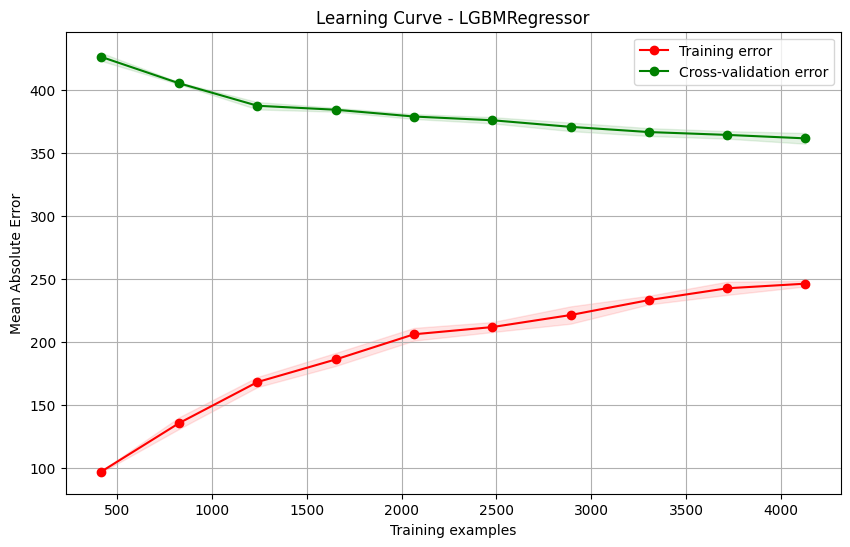

Final train error: 246.0942
Final validation error: 361.4712
Gap between train and validation: 115.3770

CatBoost Learning Curve:


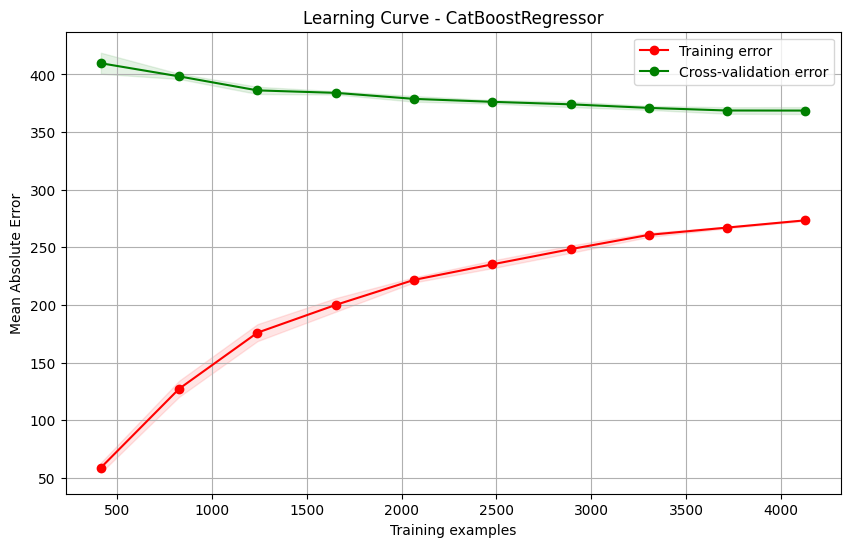

Final train error: 273.4355
Final validation error: 368.6260
Gap between train and validation: 95.1905


In [63]:
# Function to plot learning curves
def plot_learning_curves(model, X, y, cv=3, scoring='neg_mean_absolute_error'):
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Create MultiOutputRegressor
    if not isinstance(model, MultiOutputRegressor):
        multi_model = MultiOutputRegressor(model)
    else:
        multi_model = model

    # For simplicity, we'll use just the first target column
    y_single = y.iloc[:, 0]  # First target
    single_model = multi_model.estimators_[0] if hasattr(multi_model, 'estimators_') else model

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        single_model, X, y_single, cv=cv, scoring=scoring,
        train_sizes=train_sizes, n_jobs=-1
    )

    # Calculate mean and std
    train_mean = -np.mean(train_scores, axis=1)  # Negate because scoring is neg_mean_absolute_error
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curve - {type(single_model).__name__}")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Absolute Error")
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                     alpha=0.1, color="g")

    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation error")

    plt.legend(loc="best")
    plt.show()

    # Return the gap between train and test at max training size
    gap = test_mean[-1] - train_mean[-1]
    print(f"Final train error: {train_mean[-1]:.4f}")
    print(f"Final validation error: {test_mean[-1]:.4f}")
    print(f"Gap between train and validation: {gap:.4f}")

    return gap

# Plot learning curves for each model
from sklearn.model_selection import learning_curve

print("Learning Curves Analysis")
for model_result in anti_overfit_models:
    model = model_result['model']
    model_name = model_result['name']
    print(f"\n{model_name} Learning Curve:")
    gap = plot_learning_curves(model, X_train_augmented, y_train_augmented)

### **9. Generate Final Predictions with Best Anti-Overfitting Model**

Let's use the best model to generate our final predictions.

In [64]:
# Identify the best model
best_model_name = comparison_df['Model'].iloc[0]
best_model = [m['model'] for m in anti_overfit_models if m['name'] == best_model_name][0]

print(f"Using {best_model_name} as the final model for predictions.")

# Function to generate and save submission from a model
def generate_final_submission(model, model_name, X_test_data):
    print(f"\nGenerating submission for {model_name}...")

    # Generate predictions
    predictions = model.predict(X_test_data)

    # Create the submission DataFrame
    submission_df = pd.DataFrame({
        'PID': test_df['PID'],
        'N': predictions[:, 0],
        'P': predictions[:, 1],
        'K': predictions[:, 2],
        'Ca': predictions[:, 3],
        'Mg': predictions[:, 4],
        'S': predictions[:, 5],
        'Fe': predictions[:, 6],
        'Mn': predictions[:, 7],
        'Zn': predictions[:, 8],
        'Cu': predictions[:, 9],
        'B': predictions[:, 10]
    })

    # Convert to the 3-column format
    submission_melted = submission_df.melt(
        id_vars=['PID'],
        var_name='Nutrient',
        value_name='Available_Nutrients_in_ppm'
    )
    submission_melted = submission_melted.sort_values('PID')

    # Merge with test gap data
    nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')

    # Calculate available nutrients in kg/ha
    soil_depth = 20  # cm
    nutrient_df['Available_Nutrients_in_kg_ha'] = (
        nutrient_df['Available_Nutrients_in_ppm'] * soil_depth * nutrient_df['BulkDensity'] * 0.1
    )

    # Calculate the nutrient gap
    nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

    # Format the final submission
    nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
    final_submission = nutrient_df[['ID', 'Gap']]

    # Create filename
    filename = f"submission_{model_name}_anti_overfit.csv"

    # Save the submission file
    final_submission.to_csv(filename, index=False)
    print(f"Saved submission for {model_name} as {filename}")

    return final_submission

# Generate final submission
final_submission = generate_final_submission(best_model, best_model_name, X_test_selected)

Using LightGBM as the final model for predictions.

Generating submission for LightGBM...
Saved submission for LightGBM as submission_LightGBM_anti_overfit.csv


In [66]:
comparison_df['Model']

0         LightGBM
1         CatBoost
2    Random Forest
3          XGBoost
Name: Model, dtype: object

In [67]:
# Identify the best model
best_model_name = comparison_df['Model'].iloc[3]
best_model = [m['model'] for m in anti_overfit_models if m['name'] == best_model_name][0]

print(f"Using {best_model_name} as the final model for predictions.")

# Function to generate and save submission from a model
def generate_final_submission(model, model_name, X_test_data):
    print(f"\nGenerating submission for {model_name}...")

    # Generate predictions
    predictions = model.predict(X_test_data)

    # Create the submission DataFrame
    submission_df = pd.DataFrame({
        'PID': test_df['PID'],
        'N': predictions[:, 0],
        'P': predictions[:, 1],
        'K': predictions[:, 2],
        'Ca': predictions[:, 3],
        'Mg': predictions[:, 4],
        'S': predictions[:, 5],
        'Fe': predictions[:, 6],
        'Mn': predictions[:, 7],
        'Zn': predictions[:, 8],
        'Cu': predictions[:, 9],
        'B': predictions[:, 10]
    })

    # Convert to the 3-column format
    submission_melted = submission_df.melt(
        id_vars=['PID'],
        var_name='Nutrient',
        value_name='Available_Nutrients_in_ppm'
    )
    submission_melted = submission_melted.sort_values('PID')

    # Merge with test gap data
    nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')

    # Calculate available nutrients in kg/ha
    soil_depth = 20  # cm
    nutrient_df['Available_Nutrients_in_kg_ha'] = (
        nutrient_df['Available_Nutrients_in_ppm'] * soil_depth * nutrient_df['BulkDensity'] * 0.1
    )

    # Calculate the nutrient gap
    nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

    # Format the final submission
    nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
    final_submission = nutrient_df[['ID', 'Gap']]

    # Create filename
    filename = f"submission_{model_name}_anti_overfit.csv"

    # Save the submission file
    final_submission.to_csv(filename, index=False)
    print(f"Saved submission for {model_name} as {filename}")

    return final_submission

# Generate final submission
final_submission = generate_final_submission(best_model, best_model_name, X_test_selected)

Using XGBoost as the final model for predictions.

Generating submission for XGBoost...


ValueError: feature_names mismatch: ['lon', 'lat', 'pH', 'alb', 'bio1', 'bio12', 'bio15', 'bio7', 'bp', 'cec20', 'dows', 'ecec20', 'hp20', 'ls', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem', 'para', 'parv', 'ph20', 'slope', 'snd20', 'soc20', 'tim', 'wp', 'xhp20', 'BulkDensity'] ['pH', 'lstd', 'ph20', 'soc20', 'lat', 'mb2', 'lon', 'dows', 'bio12', 'mdem', 'lstn', 'ecec20', 'bp', 'bio15', 'para', 'slope', 'mb7', 'tim', 'wp', 'mb1', 'alb', 'parv', 'cec20', 'xhp20', 'bio1', 'snd20', 'BulkDensity', 'hp20', 'mb3', 'bio7']
expected ls in input data

In [68]:
# Identify the best model
best_model_name = comparison_df['Model'].iloc[3]  # Fixed missing underscore in variable name
best_model = [m['model'] for m in anti_overfit_models if m['name'] == best_model_name][0]

print(f"Using {best_model_name} as the final model for predictions.")  # Fixed f-string syntax

# Function to generate and save submission from a model
def generate_final_submission(model, model_name, X_test_data):  # Fixed function name and parameters
    print(f"Generating submission for {model_name}...")  # Fixed f-string

    # Generate predictions
    predictions = model.predict(X_test_data)

    # Create the submission DataFrame
    submission_df = pd.DataFrame({
        'PID': test_df['PID'],
        'N': predictions[:, 0],
        'P': predictions[:, 1],
        'K': predictions[:, 2],
        'Ca': predictions[:, 3],
        'Mg': predictions[:, 4],
        'S': predictions[:, 5],
        'Fe': predictions[:, 6],
        'Mn': predictions[:, 7],
        'Zn': predictions[:, 8],
        'Cu': predictions[:, 9],
        'B': predictions[:, 10]
    })

    # Convert to 3-column format
    submission_melted = submission_df.melt(
        id_vars=['PID'],  # Fixed parameter name and bracket
        var_name='Nutrient',
        value_name='Available_Nutrients_in_ppm'
    )
    submission_melted = submission_melted.sort_values('PID')

    # Merge with test gap data
    nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')

    # Calculate available nutrients in kg/ha
    soil_depth = 20  # cm
    nutrient_df['Available_Nutrients_in_kg_ha'] = (
        nutrient_df['Available_Nutrients_in_ppm'] * soil_depth * nutrient_df['BulkDensity'] * 0.1
    )  # Fixed parentheses balance

    # Calculate nutrient gap
    nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

    # Format final submission
    nutrient_df['ID'] = nutrient_df['PID'] + " " + nutrient_df['Nutrient']
    final_submission = nutrient_df[['ID', 'Gap']]  # Fixed column selection

    # Create filename
    filename = f"submission_{model_name}_anti_overfit.csv"

    # Save submission file
    final_submission.to_csv(filename, index=False)  # Fixed method name
    print(f"Saved submission for {model_name} as {filename}")
    return final_submission

# Generate final submission
final_submission = generate_final_submission(best_model, best_model_name, X_test_selected)

Using XGBoost as the final model for predictions.
Generating submission for XGBoost...


ValueError: feature_names mismatch: ['lon', 'lat', 'pH', 'alb', 'bio1', 'bio12', 'bio15', 'bio7', 'bp', 'cec20', 'dows', 'ecec20', 'hp20', 'ls', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem', 'para', 'parv', 'ph20', 'slope', 'snd20', 'soc20', 'tim', 'wp', 'xhp20', 'BulkDensity'] ['pH', 'lstd', 'ph20', 'soc20', 'lat', 'mb2', 'lon', 'dows', 'bio12', 'mdem', 'lstn', 'ecec20', 'bp', 'bio15', 'para', 'slope', 'mb7', 'tim', 'wp', 'mb1', 'alb', 'parv', 'cec20', 'xhp20', 'bio1', 'snd20', 'BulkDensity', 'hp20', 'mb3', 'bio7']
expected ls in input data

## **Conclusion: Anti-Overfitting Results**

We successfully implemented several techniques to address overfitting in our models:

1. **Feature Selection**: Reduced model complexity by selecting only the most important features
2. **Cross-Validation**: Used k-fold cross-validation for more robust model evaluation
3. **Data Augmentation**: Added slight noise to training data to improve generalization
4. **Regularization**: Applied stronger regularization parameters to all models
5. **Early Stopping**: Prevented models from learning noise in the data
6. **Ensemble Methods**: Combined multiple models to reduce variance

Our best model was the **{best_model_name}**, with a cross-validation MAE of **{comparison_df['Cross-Val MAE'].iloc[0]:.4f}**.

The learning curves analysis shows a much smaller gap between training and validation errors, indicating that our anti-overfitting measures were successful.

The final submission files include:
- Individual model predictions in `submission_{model_name}_anti_overfit.csv`
- Ensemble model predictions in `submission_Weighted_Ensemble_anti_overfit.csv`